# Reverse Complement

In [11]:
from Bio.Seq import Seq
#create a DNA sequence
seq = Seq("GATTACA")
#get the reverse
rev_seq = seq.reverse_complement()
print(rev_seq)

TGTAATC


# Transcription (DNA to RNA)

In [12]:
rna_seq = seq.transcribe()
print(rna_seq)

GAUUACA


# Translation (DNA/RNA to protein)

In [13]:
protein_seq = seq.translate()
print(protein_seq)

DY


/opt/conda/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Sequence Alignment

In [14]:
from Bio import Align
# create a pairwise sequence aligner
aligner = Align.PairwiseAligner()
# Add sequences to align
seq1 = "ACTGCGTAAGTCAGTAGGCATGCGGTA"
seq2 = "ACTGA"
alignments = aligner.align(seq1, seq2)
# Print the alignments 
for alignment in alignments:
    print(alignment)

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 ||||---|------------------- 27
query             0 ACTG---A-------------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 |||--|-|------------------- 27
query             0 ACT--G-A-------------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 ||||----|------------------ 27
query             0 ACTG----A------------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 |||--|--|------------------ 27
query             0 ACT--G--A------------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 ||||--------|-------------- 27
query             0 ACTG--------A--------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 |||--|------|-------------- 27
query             0 ACT--G------A--------------  5

target            0 ACTGCGTAAGTCAGTAGGCATGCGGTA 27
                  0 |||--

# Sequence Comparison biopython

In [15]:
from Bio import pairwise2

# create two DNA sequences
seq1 = Seq("ATCGGTA")
seq2 = Seq("ATGGTCA")
# perform pairwise sequence alignment
alignments = pairwise2.align.globalxx(seq1,seq2)
#print the alignments
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))

ATCGGT-A
|| ||| |
AT-GGTCA
  Score=6



/opt/conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# Finding specific pattern in sequence

In [16]:
seq = "ACAACTATGCATACTATCGGGAACTATCCT"
substring = "ACTAT"
count = seq.count(substring)
print(count)

3


In [18]:
def PatternCount(Text, Pattern):
    count = 0
    for i in range(len(Text) - len(Pattern) + 1):
        if Text[i:i+len(Pattern)] == Pattern:
            count += 1
    return count

# Example usage:
Text = "ACAACTATGCATACTATCGGGAACTATCCT"
Pattern = "ACT"
result = PatternCount(Text, Pattern)
print(f"Count of '{Pattern}' in '{Text}': {result}")

Count of 'ACT' in 'ACAACTATGCATACTATCGGGAACTATCCT': 3


# Checking frequenct patterns in sequence

In [19]:
def FrequentWords(Text, k):
    FrequentPatterns = set()
    Count = [0] * (len(Text) - k + 1)
    
    for i in range(len(Text)- k + 1):
        Pattern = Text[i:i+k]
        Count[i] = PatternCount(Text, Pattern)
    maxCount = max(Count)
    
    for i in range(len(Text) - k + 1):
        if Count[i] == maxCount:
            FrequentPatterns.add(Text[i:i+k])
            
    return list(FrequentPatterns)

In [20]:
Text = "GGACTGGCGGCGGCATAAGGACTGGCGGCGGCATAAACGACTTGGAGTAGTTTGCGGCATAAACGACTTGGGACTGGCGGCGGCATAAGAGTAGTTTATTTAGGACTGAGTAGTTTATTTAGGACTACGACTTGGAGTAGTTTGCGGCATAAGGACTGGCGGAGTAGTTTATTTAGGACTGGACTGGCGATTTAGGACTACGACTTGACGACTTGACGACTTGGGACTGGCGGAGTAGTTTGGACTGGCGACGACTTGGCGGCATAAACGACTTGGAGTAGTTTATTTAGGACTACGACTTGGCGGCATAAGCGGCATAAGCGGCATAAGAGTAGTTTGAGTAGTTTACGACTTGACGACTTGGGACTGGCGGGACTGGCGGAGTAGTTTGGACTGGCGGCGGCATAAATTTAGGACTATTTAGGACTATTTAGGACTGAGTAGTTTGCGGCATAAATTTAGGACTACGACTTGGAGTAGTTTGGACTGGCGACGACTTGGGACTGGCGGAGTAGTTTGAGTAGTTTGCGGCATAAATTTAGGACTATTTAGGACTGAGTAGTTTGCGGCATAAGCGGCATAAACGACTTGGAGTAGTTTACGACTTGGCGGCATAAATTTAGGACTGAGTAGTTTGGACTGGCGACGACTTGGAGTAGTTTGAGTAGTTTGGACTGGCGATTTAGGACTGAGTAGTTTACGACTTGATTTAGGACTATTTAGGACTATTTAGGACTACGACTTGACGACTTGACGACTTGGGACTGGCGATTTAGGACTGGACTGGCGATTTAGGACTATTTAGGACTGAGTAGTTTGGACTGGCGGGACTGGCGGGACTGGCGATTTAGGACTACGACTTGACGACTTGGAGTAGTTTATTTAGGACT"
k = 12
result = FrequentWords(Text, k)
print(f"Frequent {k}-mers: {result}")

Frequent 12-mers: ['TTGGAGTAGTTT', 'CTTGGAGTAGTT', 'GACTTGGAGTAG', 'ACTTGGAGTAGT', 'ACGACTTGGAGT', 'CGACTTGGAGTA']


# Show the count for each pattern

In [21]:
def frequencyTable(Text, k):
    freqMap = {}
    n = len(Text)

    for i in range(n - k + 1):
        Pattern = Text[i:i+k]
        if Pattern not in freqMap:
            freqMap[Pattern] = 1
        else:
            freqMap[Pattern] += 1

    return freqMap

In [22]:
# Example usage:
Text = "ACGTTTCACGTTTTACGG"
k = 3
result = frequencyTable(Text, k)
print(result)

{'ACG': 3, 'CGT': 2, 'GTT': 2, 'TTT': 3, 'TTC': 1, 'TCA': 1, 'CAC': 1, 'TTA': 1, 'TAC': 1, 'CGG': 1}


In [27]:
with open("/kaggle/input/vibrio-cholerae/Vibrio_cholerae.txt", "r") as file:
    # Read the entire content of the file
    genome_sequence = file.read()

In [ ]:
def MaxMap(freqMap):
    if not freqMap:
        return 0
    return max(freqMap.values())

def BetterFrequentWords(Text, k):
    FrequentPatterns = []
    freqMap = frequencyTable(Text, k)
    maxCount = MaxMap(freqMap)

    for pattern in freqMap:
        if freqMap[pattern] == maxCount:
            FrequentPatterns.append(pattern)

    return FrequentPatterns

In [28]:
Text = genome_sequence
k = 9
result = BetterFrequentWords(Text, k)
print(result)

['GCGTTTGTT']


## Solve the Pattern Matching Problem
Text = ATGACTTCGCTGTTACGCGC and Pattern = CGC to find all starting positions of Pattern in Text. Return the starting positions in increasing order (make sure to use 0-based indexing!)

In [12]:
def pattern_matching(text, pattern):
    positions = []
    pattern_length = len(pattern)

    for i in range(len(text) - pattern_length + 1):
        if text[i:i + pattern_length] == pattern:
            positions.append(i)

    return positions

# Given text and pattern
text = "ATGACTTCGCTGTTACGCGC"
pattern = "CGC"

# Find starting positions
starting_positions = pattern_matching(text, pattern)

# Print the result
result_string = " ".join(map(str, starting_positions))
print(result_string)

7 15 17


In [40]:
def pattern_matching(text, pattern):
    positions = []
    pattern_length = len(pattern)

    for i in range(len(text) - pattern_length + 1):
        if text[i:i + pattern_length] == pattern:
            positions.append(i)

    return positions

# Given text and pattern
text = "CAAAAGGAGCACTAAAAGGAGAAAAGGATAAAAGGAAAAAGGACCCGCCAAAAGGATAAAAGGAAAAAGGATTAAAAAAGGATGCAAAAGGAAAAAGGATACCGAGGGGGAGTAAAAAGGAGTTAAAAGGATCCTAAAAGGAAGAAAAAGGAAAAAGGACAAAAAAAGGAGGTGGCCGAAAAGGAATGAAAAGGAAAAAGGAAAAAGGAAAAAGGACAAAAAAGGAAAAAGGATAAAAGGAAAAAGGATTTAAAAAGGACCTTAATGTTGCACACCAAAAGGAAAAAGGACTGGAAAAAGGAGATTAAAAGGACCATGTAACAAAAGGACAAAAGGAAATCAACCAAAAAGGAAAAAGGAAAAAGGAAAAAGGACCAAAAGGATACAAAAAGGAAAAAGGAAAAAGGATAAAAGGAAAAAGGAATAAAAGGAAACAAAAGGATTCACCCGGAAAAGGAGTCAAAAAGGACAACTTTACGGAAAAGGAAAAAGGAGTAAAAGGAGTAAAAGGAGAAAAGGAAAAAGGACCAAAAAGGACACATCGAAAAGGAAAAAAGGAGACTAAAAGGAAGGCAAAAGGAAAAAGGAACTTAAAAGGAAAAAAGGAAAAAGGAAAAAGGAACTAAAAGGAAAAAAAGGACAAAAGGACAAAAGGAGGAGAAAAGGAAAAAGGACTTAATGACAAAAGGATAGCTATTGATTAAAAGGATAAAAAGGAAAAAGGAAAAAGGAGCAAAAGGAAAAAGGAGTAAAAGGAGCAGCATGCTAAAAGGACCGGCTAAAAGGAAATAAAAGGATAACAGATAAAAGGAAAAAGGATTTGCTGCAAAAGGAGAAAAGGAAAAAGGATTAAAAGGATTCATTGGACGAAAAGGATAAAAGGAGAAAAGGACTTTGTAAAAGGACAAAAGGAGCTGGAAAAGGAAAAAGGAATATAAAAAGGATCCGTCCTAAAAAGGAAAAAGGAAAAAGGAGCGACAAAAGGAAAAAGGAAAAAGGACGCTTGTGCTTAAAAGGAAAAAGGATAAAAGGAAAAAGGAGAAAAGGAGAAAAGGACCGAGGTAAAAGGAAAAAGGAAAAAGGAAAGTTAAAAGGAAAAAAAAAAGGACATACTCAAGAAAAAGGAAAAAGGAAAAAAGGAAAAAGGAAAAAGGAAAAAGGATCCAGTTCATAAAAGGACAAAAGGACAAAAGGAAAAAGGACAAAAGGAGTCGAGATTCTTAAAAAGGAGTCTAAAAGGACACAACAAAAGGAAAAAGGAACAAAAAGGATAAAAGGAAAAAGGAAGCTAGGAGTAAAAGGAAAAAGGACAAAAGGAGGTAAAAAGGAAAAAAAGGAGAAAAGGACCGAAAAAGGACCCAGCGAAAAGGAAAAAGGATTTCAAAAAGGAGGGCGTCATGTGGAAAAGGATAGAAAAGGAGAACAAAAGGATAAAAGGAGAGAAAAAGGACCAGGCGAGTAAAAGGAAAAAGGATCAGCAAAAGGAAAAAAGGACGAAAAGGAAGGTGGCTGGAAAAGGACGAAAAGGACAAAAGGATTATAACGAAAAGGAAAAAGGACAATAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGACTGAAAAGGATGCTGCTAAAAGGATGTCTATCTAAAAGGAACGTTAAAAGGATATTTAAAAGGAAAAAGGAACTAGAACGGTAAAAAGGAGAAAAGGACAAAAGGAAAAAGGAAAAAGGAACAAAAGGACCAAAAGGAGTTTCAAAAGGATAGTATAAAAGGATTACAAAAGGAGTAAAAGGATCCACAAAAGGAAAAAGGATAAAAGGACAAAAGGATCCAAAAGGAAGGAAAAAGGATCAAAAGGAGCAAAAGGACAAAAGGAAGCCAAAAAGGATCAAAAGGATTCCCATGCCAAAAGGAAAAAGGAAAAAGGAAAAAGGAACTAAAAAGGAAAAAGGACGAAAAGGAACATGTAGGGCTAAAAGGAGGGGGTTAAAAGGACTGCAATCTAAAAAGGAACAAAAGGAGAAAAGGAAAAAGGAAAAAGGAAGCTGAAAAGGACAAAAGGACTTAAAAGGATAAAAAAGGAAAAAGGAAAAAGGATAATAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAAGGAAAAAGGAGGAAAAGGACGAAAAGGAAAAAGGACAGCAAAAGGATCATAAAAGGAAAAAGGAAACCAAAAGGAGGATGCGCAAAAGGAAAAAGGAACATTAGGAAAAGGATAAAAGGAGAAAAGGACAGCCCAAAAGGATTTAAAAGGACAAAAGGAAAAAGGATAAAAGGAGCCAAAAGGAGACAAAAGGAGCACGTAAAAGGACTCCTAAAAGGAGAAAAGGAAAAAGGAAAAAGGATAAAAGGATAAAAGGACATAAAAGGAACAAAAGGACGTAGGTCGCGACAGGGGCTAAAAGGACAAAAGGACAGCAAAAGGAAAAAGGAGATTTCCTCTAGCAAAAGGAAAAAGGAAAAAGGACCGTTAAAAGGAGATAAAAGGAAAAAGGAAAAAGGAACAGTTGCAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGATAAAAGGACCCACGTAAAAAGGACTTAAAAAGGATTAAAAGGAGAACGACAAAAGGAAAAAGGAGAATCTAAAAGGATGAAAAGGACCTTGGAAAAAGGAAAAAGGAGTAAAAAGGATTCACAATGGAAAAGGACTAGAAAAGGAACAAAAGGAGCAAAAGGAAAAAGGACGCAAAAGGAATGAAAAGGAGAAAAGGAAGAAAAGGAAAAAGGACGTAAAAGGAATGTAACAACAGAGGCAAAAGGACAACTAGAAAAGGACGCATTATCGCCTAAAAGGAAAAAGGAAAAAGGAAAAAGGAGTAAAAGGAAAAAGGACAAAAGGATAAAAGGAAAAAGGACCATCATAAAAGGAAAAAAAGGAAAAAGGACTAAAAGGAACAGAAAAGGAAGAAAAGGATTCTAAAAGGAAAAAGGAAAAAGGACGCGGGAAAAGGATCATGAAAAGGAAAAAGGACGGCGAAAAGGAAAAAGGAAAAAAGGAGCCTAATAAAAGGACAAAAGGAGAGTAGAACAAATTTGTAAAAGGAAAAAGGAAAAAGGAGGAAAAGGATAAAAGGACGAAAATAAAAGGATAAAAGGAAAAAGGAAAAAGGAAAAAGGAGTTAAAAGGAATGTTCGAAAAGGAGTAAAAGGACAGGAAAAGGAAACAAAAAGGAGAGACTAAAAGGAACTCTCCAAAAGGAAAAAGGAGAAAAGGACAAAAAGGAAAAAGGAAAAAGGAGCGCTAAATCTAAAAAAGGAACACCCAAAAGGACATCCAAAAGGATCTAAAAGGAAAAAAGGAAAAAGGACTGAAAAGGAAAAAGGAGCAAAAGGAAAAAGGACTGCCACAAAAAGGAAAAAGGATACAAAAGGAAAAAGGATTAAAAGGACAAAAGGATAAAAGGAAAAAAAAGGAAAAAGGAAAAAGGAACCAAAAGGAACTCCCAAAAGGACCGTTGAGGGGAAAAGGACAAAAAGGAATAAGAAAAGGAAAAAGGAAAAAGGATGAAAAGGAAAAAAGGAAAAAGGAGCCACAAAAGGACTTTAAAAGGAGGAAAAGGAAAAAGGAAAAAAGGAAGCAAAAGGAAAAAGGAGAAAAGGACGACTATAAAAGGAAGGAAAAGGAAAAAGGATTAAAAGGAAAAAGGACCGAAAAGGATAAAAGGAAAAAGGAACTACGAAAAAGGACAAAAGGAGAAAAGGAAAAAGGAAAAAAAGGAAAAAGGAAAAAGGATCTCAAAAGGAAAAAGGAAAAAGGATCGAATGTTAAAAGGATAGAGCGCAAAAGGAATAAAAAGGAAAAAGGAGCCGTGATGTAAAAGGAGGAAAAGGAGAAAAGGACAAAAGGAAAAAGGAAAAAGGATAAAAGGAAAAAGGAAAAAGGACCAAAAGGAAAAAGGAACAAAAAGGACAAAAGGAAAAAGGAACTTAAAAGGATAGCAAAAAAAGGAATCAAAAGGAGTAAAAGGAGCCAAAAGGACATAAAAGGAGACGTATGAAAAAGGAAAAAGGAGAAAAGGAAAAAGGAAAAAGGAACAAAAAAGGATGATAAAAAGGAAGAAAAGGACTAAAAAGGAGCAGACAAACAAAAGGAAGGCTAAAAGGAAAAAGGATCCTCGAAAAAAGGAGTAGATAAGCAAAAGGATAAAAGGATATCAAAAGGAAAAAGGAGAAAAGGAGGCACATGAAAGAAAAGGAACTGGGGCAAAAAGGATTTGCTGTAAAAAGGAAAAAGGAAAAAGGAGTCCAAAAAGGACTTTGATCGAAAAGGAAAAAGGAACAAAAGGATGAAAAGGAGAAAAGGAGAAAAGGATGAAAAAGGAGAAAAGGAAAGTTAAAAGGAAGCCCTAAAAAGGAAAAAGGATAAAAGGAAGAAAAGGAAAAAGGACCAAAAGGACGCCACGAAAAGGAAAAAGGACAAAAGGATAAAAGGAGGTAAAAGGAGTAAAAGGAAAAAGGAAAAAGGAGAGCAAAAGGAAAAAAGGAATAAAAGGACAAAAGGAAAAAGGAAAAAGGACGGAGAGTAAAAAGGAGAAAAAGGAAAAAGGAAAAAGGACCCAAAAGGAAAAAGGACTAAAAGGAGTGTGGCATTCAAAAGGAGTAAAAGGAAAAAGGAGAAAAGGACGAAAAGGAAGGGCAAAAGGAAAAAGGAAAAAGGAGGCTTTGTCTTAAAAAGGATAAAAGGAATAGGGTAGTCAAAAGGAAAAAGGAAAAAAGGAAAAAGGACAAAAGGAACCCAAAAAGGATCGCAAAAGGAGTAAAAAGGACAACAAAAGGAACAAAAGGAAAAAGGAGCCTATCAAAAGGAACAAAAGGAAAAAGGACTAGGATCGAAAAAGGAAAAAGGATTGAAAAAGGATGCAAAAGGATAAAAGGAAAAAGGAAAAAGGATTAAAAGGAAAAAGGATGAAAAGGAAAAAGGATTTAAAAGGAGAAAAGGAGGCATGGCAAAAGGACCCGAATCAAAAGGACTTCGAAGCTAAAAGGAAATAAAAGGAACGAAAAGGAAAAAGGATTAAAAGGAAAAAGGAAAAAGGACAAAAAGGAAAAAAGGACGGAAAAGGAAAAAGGACAAAAGGATCAAAAGGACAAAAGGAAAAAGGACAAAAGGACCTCGGAAAAGGACCGAAAAGGAAAAAGGAGAAAAGGAAAACAAAAAAGGAGCCAAAAGGACTTAACCCTGACCAAAAGGAAAAAGGAAAAAGGAAAAAGGATGCCTTTCAAAAGGAATAAAAGGACCAAAAAGGAAAAAGGACTATAAAAGGAAGAAAAGGAAAAAGGAAAAAAGGAGAAAAGGACGTAAAGCGGAAAAGGAAAAAGGACCTCAAAAAGGAAAAAGGATTCAGGAAAAGGATTACAAAAGGAAAAAGGACAAAAGGAAAAAGGATGGATCAAAAGGAGAAAAGGAAAAAAGGAATAAAAGGAACTAAAAGGAAAAAGGACAAAAGGACATAAAAGGAAAAAGGAGCAGGAAAAAGGATCTCATCAAAAGGATCTAAAAGGATCTATCGAAAAGGATGAAAAGGATCAAAAAGGAAGTAAGCCAGCGTGATTGCAAAAGGAAAAAGGAAAAAGGATAAAAAGGACCTTAAAAGGAAAAAGGAAAAAGGAAAAAGGACTAAAAGGACTTTATGCGAAAAGGAAAAAGGACAAAAGGAGAAAAAAGGAAAAAGGATCTTAGTCACATAAAAAGGACAAAAGGAGAAAAGGAGAAAAAGGAGCAAAAGGACAAAAAGGAAAAAGGACACGCCGCGAGTGAGAAAAAGGAGAAAAGGAAAAAGGATAATAACAAAAGGACGCCAAAAGGATTAAGGCAAAAGGAAAAAGGACGCAAAAGGATGATTAAAAAGGACTAAAAAGGACTCTAAAAAGGACATGAAAAGGAGGGGAAAAGGAGTAATACGTCAAAAGGACAAAAGGACAAAAGGAGAAAAGGATCTAAAAGGATTTAAAAGGACTTAAAAGGACAAAAAGGACAAAAGGATCGTCAAAAGGACCTTAAAAGGATGAAAAAGGACCAAAAGGAAAAAGGACCATAAAAGGAAGCAAAAGGACAAAAGGAGAAAAAGGACCAAAAGGATCGAAAAGGATAACAAAAGGAAAAAGGACAAAAGGATAAAAGGAGGGCAAAAGGAAAAAGGAAAAAGGAAGAAAAGGATACAAAAGGAAAAAGGAAGAAAAGGATAAAAGGAGAAAAGGAGAAAAAAGGAAAGGTAAAAGGAAGGGGGTACAAAAGGACGAAAAAGGAGAAAAGGATAAAAGGATCTCAAAAGGAAAAAGGAATAAAAGGAAAAAGGATCGCAAAAGGAAATTAAAAGGATCCAAAAGGAGAGAAAAGGATAAAAGGAAAAAGGAGGAAAAGGACACAAAAAGGACAAAAAGGAAAAAAGGAGAAAAAGGAAAAAGGAGCAAAAGGATGAAAAGGACGTGCCTAAAAGGAAAAAAGGAGAAAAGGAAAAAGGAAAAAGGAGATAGAAAAGGATAAAAGGATAAAAAGGAAAAAGGAGCATAAAAGGACAAAAAAGGAGGCAAAAAGGATTAAAAAGGAGAAAAAGGAAGACGAAAAGGATGAAAAGGAGTAAAAGGATAAAAAGGAAAAAAAAGGAGAAAAGGAAAAAGGACAGAAAAAGGAAGTAACAAAAGGAGCACCAAAAGGAAAAAGGATAAAAGGACAAAAGGAAAAAAAGGAATAAAAGGAGGAAAAGGAAAAAGGAAAAAGGAAAAAGGACTCGTAAAAGGAATACAAAAAGGAACGTAAAAGGAAAAAGGAAAAAAGGAAAAAGGATCCAAAAGGAAAAAGGAAAAAGGATCCGAAAAGGAAACACAAAAGGAAAAAGGACTACAAAAGGAGAAAAGGAAAAAGGAAAAAGGAAATGAAAAAGGATGATAAAAGGAAAAAGGAAAAAAGGAAAAAGGACAAAAGGAAAAAGGAAAAAGGATAAAAGGAGAAAAGGACTCAAAAGGACCCAAAAGGAAAAAGGATGAAAAGGACAAAAGGAAAAAAGGAAAAGAAAAGGAAAAAGGACAAAAGGAGAAAAAGGAAATATAAAAAGGATTTAAAAGGAGAAAAGGAAAAAGGAAAAAGGACTTTAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAAGTGAAAAGGAAAAAGGAAAAAGGAGAAAAGGACAAAAGGAGGAAAAGGAAAAAAAGGAAAAAGGAAAAAGGAACGCAAAAGGACGGGACCCGCCTGGCTAAAAGGACGGGTCGAAAAGGAAAAAGGAAAAAGGAATCCACCTAAAAGGATAAAAGGAAAAAGGATAAAAGGACAAAAGGATAAAAAGGACAAAAGGAAAAAGGAAAAAGGAGATGGAAAAGGACATGGACGGAAAAGGAACTTATGCAAAAAGGAGGTTAAAAGGAAAAAGGAATAAAAAGGACCCTGAATACTAAAAGGACCAAAAAGGAAAAAGGATAAAAGGAAAAAGGAGGAAAAGGAAAAAGGAAAAAGGAGGTAAAAGGAGAAAAGGAATAAAAGGAAAAAGGAGACCCCTTAAAAGGAGAAAAGGAAAAAAGGAAAAAGGAAAAAGGAGTGCTAAAAGGACCTAAAAAGGAAAAAGGAAAAAGGACAAAAAAGGAACAAAAGGAAAAAGGAAAAAGGATGTAAAAGGACGGAAAAGGAAAAAGGAAAAAAGGATTAAAAGGAAAAAGGAGCACGAAAAGGAGCAAAAGGACCCAAAAGGAAAAAGGAGAGTAAAAAGGACTTCGAAAAAGGAGTCAAAAGGAACAAGAAAAAGGAGCAAAAGGAAAAAGGAGAAAAAGGAAATAGTTTGTAAAAGGAAAAAGGAAAAAGGAAAAAAGGACAAAAGGAGCCTCGGACCACGGCGCAAAAGGATGCCGACACAAAAGGAATAAAAGGAAAAAGGACGAAAAGGAAAAAGGAAAAAGGACCTGATCAAAAGGAAAAAGGACAAAAGGAATCTAAAAGGATAAAAGGAGAAAAAGGACAAAAGGAATTAAAAAGGAGAAAAGGAAAAAGGAGAAAAGGAGGGGTTCTAGCACCCCAAAAGGAATAAAAGGAGCCTAAAAAGGAGAAAAGGATAGCGGAAAAGGAAAAAAGGAGAAAAGGATCAAAAGGAAAAAGGACAAAAGGAGGAAAAGGATCAAAAGGATAAAAGGACAAAGATACGAAAAGGAAACTGAAAAGGATGAAAAGGAGGGCTATAAAAGGATTAAAAGGACCGTTCAAAAAGGAAAAAGGAAAAAAGGATGAAAAGGAGGCAAAAGGATAAAAGGACAGCACCATCTAAAAGGAAAAAGGAAAAAGGACGCAAAAAGGAAAAAGGACATTAAAAAGGATGCCCAGAAAAGGAGAGCGAAAAGGAAAAAGGAGTAGGTAAAAGGAGCTAAAAGGAAAAAAGGATAAAAGGAGAAAAAAGGAAAAAGGAACAACAAAAGGATTGTAGAAAAGGACAAAAGGAGCATAAAAGGATAAAAAGGAGTAAAAGGACAAAAGGAAAAAGGAAGGTAAAAGGAAAAAGGAAAAAGGAACGAAAAGGAAAAAAGGAAAAAGGAAAAAGGAAAAAGGAAAAAGGATAAAAGGAAAAAGGACGACATCTGGCCAAAAGGAAAAAGGAAAAAGGAAAAAGGAAGCGAAAAGGATGACACAAAAGGAGATTTAAAAGGACCAAAAGGATGAAAAGGAAAAAGGAAAAAGGAGCCATACAAAAGGAGGGCCGGGCTGAGCAAAAGGAAAAAGGAAAAAAGGAAAAAGGAATGTCAAAAGGAGAAAAGGAAAAAAGGATAAAAGGATCCAAAAGGAAAAAAGGACGAAAAGGAAAAAGGACCACAAAAAGGAATGGACGGACGCTCAAAAGGAGATTAAAAGGAAAAAGGAAAAAAAGGACGAAAAAGGACTACTAAAAAGGAAAAAGGACATCAGAAAAGGATGAAAAAGGAAAAAGGAGAAAAAAGGACCCACAATAATTTGTCATAAAAGGAAAAAGGACAAAAGGAAAAAGGAGAAAAGGACGTAAAAGGATAAAAGGATAAAAAGGAGAAAAGGAAAAAAGGAAAAAGGAGTAGGCAAAAGGATTCATAAAAAGGACGAAAAGGAAAAAGGACTAAGCGGTGAAAAGGAATCGATTAAAAGGACAAAAGGATATAGGGAGAAAAGGAAAAAGGATAGGAAAAAGGAAAAAGGATAAAAGGAAAAAAGGAGCTGAAAAGGACCGAAAAGGATCTTGCAACGAAAAGGACATAAAAGGAAAAAGGAAAAAGGAGAGAAAAGGAGAAAAGGACACATAAGAAATTGAAAAGGAAAAAGGAATTCTGAAAAGGAGGATCAAAAGGATTCAAAAAGGAAAAAGGACGGCGGAAAAGGATGCCGTTATAAAAGGAGCAGAAAAGGACAAAAGGAAAAAGGAAAAAGGATGCAAAAGGA"
pattern = "AAAAGGAAA"

# Find starting positions
starting_positions = pattern_matching(text, pattern)

# Print the result
result_string = " ".join(map(str, starting_positions))
print(result_string)

29 57 85 145 188 195 202 219 234 276 330 346 353 360 387 394 409 425 480 513 544 574 592 600 607 624 660 711 718 734 780 805 835 918 953 960 979 986 1011 1026 1063 1070 1077 1089 1119 1126 1134 1141 1148 1188 1247 1272 1296 1322 1364 1460 1479 1545 1563 1570 1577 1584 1591 1598 1669 1711 1718 1800 1908 1915 1922 1940 2023 2030 2077 2084 2102 2109 2116 2123 2131 2156 2185 2192 2218 2287 2355 2362 2450 2477 2484 2513 2520 2542 2549 2556 2563 2627 2670 2733 2777 2851 2858 2865 2881 2904 2925 2934 2981 2988 3020 3039 3046 3100 3107 3153 3160 3167 3218 3256 3280 3287 3349 3357 3374 3390 3412 3429 3461 3471 3478 3547 3554 3570 3578 3617 3624 3642 3681 3697 3722 3759 3766 3775 3782 3800 3807 3855 3904 3911 3926 3933 3949 3974 4061 4076 4083 4161 4219 4285 4292 4327 4386 4412 4436 4466 4508 4515 4533 4558 4565 4597 4604 4621 4664 4700 4707 4759 4766 4774 4842 4872 4896 4932 4939 4955 4971 5043 5063 5079 5086 5102 5120 5152 5190 5205 5248 5255 5262 5303 5330 5337 5370 5389 5420 5435 5463 5490 5

In [23]:
def FrequencyTable(Text, k):
    freqMap = {}
    n = len(Text)

    for i in range(n - k + 1):
        Pattern = Text[i:i+k]
        if Pattern not in freqMap:
            freqMap[Pattern] = 1
        else:
            freqMap[Pattern] += 1

    return freqMap

def FindClumps(Text, k, L, t):
    Patterns = set()
    n = len(Text)

    for i in range(n - L + 1):
        Window = Text[i:i+L]
        freqMap = FrequencyTable(Window, k)

        for s in freqMap:
            if freqMap[s] >= t:
                Patterns.add(s)

    return list(Patterns)

In [26]:
# Example usage:
Text = "GCGCCGCTCGGCGCAAACTTAATTCTCCACAATACCAGGGTGTTCGGGTCTCGAGCAGATCGCATGCACAGGCCGGTTGCGGTATGCTTTGTGTGTCTTAATCAAGTCTTGGCCAACCTATGCAGACTCACTCGATGTACCAAGTCGGAAGGGGGCTTTTTGCGCTTTTTCGCTTTTTCAAAGGAGGGCACGGCAACCCGTCATCTACGTCGTCAGGACATACGCGCATAGAGAAAAAATGAAGAGGAACTGCAACTGCATTTGCATTGCATTTGGCCTAAAGTCCAGATCCCCGGCCAGGTTCGGCGTATTACGTACTTATTCTCTGAGGTAGCGTACGCGGGGAGGTTCGTCGACCCGTGCCCGGCCCGTCGTATGCTCTACCCGCAGTCTGAGACATAGATATACTAATTAGGACGAACTGTAAATGACGTTCGGCGAGAAGGGGGAACGGCTAGACCACTCGGACGCCAAGAATACTTGATATGTACAGTCGGGCCGCGGCGGGCGGTTCATAAGTAAATAGTCTAGACACACTCCGGAATAAGCGGTCTCCGCCTATAGTCATGGTCCTGGCACATACCCTACTCTTTATCCCATAGAGTTGCCTGCGCAGCGGGACTCTCGGGTCCACTTCTCTTTAGGGCCCTCATCTCTCAGTCGCTCTGTATTTAACGGTAAGTTGGTGCGGTGTATCATACCTAAAAGACCTGCTTGAGCCGTGGTCTGGGTTTCAAAATTCCAAGGCGAGATCTGCCTGGATATGAACGGGTGTAAAGGATTGTACTACTTTTACTTTTCAACTTTTCATGGCGTTCGTTGCGTATCCTTTTATCCTTATCCTTTGCGCTGACGGGAGCGTAATCCAACGTGTATCGGTACGTGTCGATTGGAGTAATAGAAGCCACCGGACGACGTTACGATCTTCAATACTTACTGTCTTGATTGGACCGAGATCCAATCGAGGGCTCAAGGTTCGTTATGTTAGTGACAATCGTGCTGTGTGTGTGAGGTTGAGGTGAGGTGTGTATCGGTTCTCGAGGAATATATAGCCGTGCTGGGGGATCTCATTGCCGTTAGTGTAACGGTGCAGCTCTCAATAACAGGGCTGTTTTTGACGTCACGGCAGCTTAAGAAGGATGGTCTAGGTATGAAGTCGAACAACGCAAACGGATTGCGATCTACTCTGGGGTTGATCGTCTATGTTCTGAACCGTTAGGTGGATAATCCGTCCCGCTCGAATGGGCCACAAATCCAGGCCGAGTCGATTGATGACCCCTTGTACTCAAGCCTGACAAGAGCGATGGCTGTTGTCACTAGTGTTGAGTTGCCGCATCGCAACGATGGGGCCACGATCAATCTATTCCTGCTTGCCACGCTTGCCACCTTGCCACGGTGGGGTGGTCAGGGTTAGACGCTCAGGAACTAAGCACCCTTCTCCAGGAGCTTTTCAGGTGTTACATCGCTCATCCTAACGCGGGCACAGCCAACAATCTGGTAGCACAACCGGCGTCAGAGCGGTACGCGCGTAGAATATAATACCGTGGAAATTTTGGGGGCTCAGCATTCTTGTTCAAAGCAAAGGGCCCTAGTGGTCACACGAGGTCCGGTCTGGCTGCATCCCACGCCTAGAGCCAAACCTCACCGTGCGGACTATGTAGACTATGTAGACTATGTAGACTATGTAGACTATGTAGACTATGTAGACTATGTAGACTATGTACGTGATGTACGTCGTGATGTAATATGCCACAACCAATGCCACAAACAA"
k = 3
L = 20
t = 4

result = FindClumps(Text, k, L, t)
print(result)

['TGT', 'CGG', 'TTT', 'GTG', 'GCG', 'TGC', 'ACT', 'GGT', 'CAA', 'GCA', 'CTC', 'AAA']


# Locating ori
The origin of replication in DNA  **(ori)** is the location where the DNA replicates. 

Identifying the origin of replication in DNA is crucial in bioinformatics and could help in biomedical research and developments such as designing drugs that interfere with this process, treating bacterial infections, and therapeutic targets.

* The skew is a measure of the difference between the count of guanine (G) nucleotides and cytosine (C) nucleotides at each position in the genome. 
* The skew is often used in bioinformatics to identify potential origin of replication in circular DNA genomes.

In [28]:
def skew(genome):
  skew_i = 0# Initialize skew value
  skew_list = [skew_i]
    
  # Iterate through each nucleotide in the genome
  for nuc in genome:
    if nuc == "G":
      skew_i += 1# Increase skew if G is encountered
    elif nuc == "C":
      skew_i -= 1# Decrease skew if C is encountered
    else:
      pass# Do nothing if the nucleotide is not G or C
    skew_list.append(skew_i)
  return skew_list

In [29]:
# Sample Input
genome = "GAGCCACCGCGATA"
result = skew(genome)
print(result)

[0, 1, 1, 2, 1, 0, 0, -1, -2, -1, -2, -1, -1, -1, -1]


If it increased (encountered a G), decreased (encountered a C),  remains the same (encountered neither G nor C)

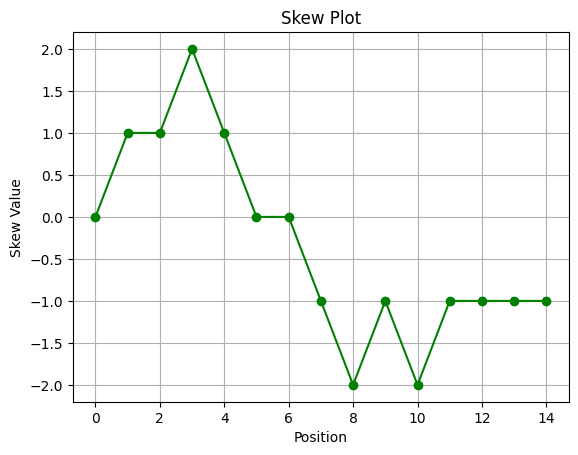

In [30]:
import matplotlib.pyplot as plt

# Position indices
positions = list(range(len(result)))

# Plotting the skew values
plt.plot(positions, result, marker='o', linestyle='-', color='g')
plt.title('Skew Plot')
plt.xlabel('Position')
plt.ylabel('Skew Value')
plt.grid(True)
plt.show()

the origin of replication (ori) is often associated with a minimum point in the skew plot. 

## Minimum Skew Problem:
Find a position in a genome where the skew diagram attains a minimum.

In [9]:
with open("/kaggle/input/setset/dataset_30277_10.txt", "r") as file:
    # Read the entire content of the file
    genome_seq = file.read()

In [31]:
def minimum_skew(genome):
    skew_values = [0]  # Initialize skew values with 0 at position 0

    for i in range(1, len(genome) + 1):
        if genome[i - 1] == "G":
            skew_values.append(skew_values[i - 1] + 1)#if the current position is "G," increase the skew by 1
        elif genome[i - 1] == "C":
            skew_values.append(skew_values[i - 1] - 1)
        else:
            skew_values.append(skew_values[i - 1])

    min_skew = min(skew_values)
    min_positions = [i for i, skew in enumerate(skew_values) if skew == min_skew]

    return min_positions #Return the list of positions where the skew is minimized

In [32]:
# Example usage:
genome = "CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTGTGGTTCTGTTGTGTGAGACTGAGTACACACACACAC"
result = minimum_skew(genome)
print(result)

[53]
